# Fit exponential distribution to dwell times

##### General settings

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from scipy.optimize import minimize

In [3]:
from dcpyps import dcio
from dcpyps import dcplots
from dcpyps.dcfits.equations import MultiExponentialPDF
from dcpyps.dcfits.stats import ObservedInformation
from dcpyps.dcfits.stats import LikelihoodIntervals

### Load intervals and plot dwell-time distribution

In [4]:
intervals = np.array(dcio.txt_load_one_col("../dcpyps/samples/etc/intervals.txt"))

Inspect loaded intervals: plot histogramm, calculate average and find range.

Mean and SD of 125 intervals = 0.840045 +/- 0.932191
	Range from 0.00107931 to 5.26632


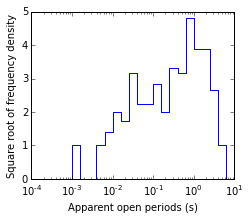

In [5]:
oxout, oyout, odx = dcplots.prepare_xlog_hist(intervals, 0.0001)
# Plot open period histogram
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(121)
dcplots.xlog_hist_data(ax, intervals, 0.0001, shut=False)
print('Mean and SD of {0:d} intervals = {1:.6g} +/- {2:.6g}'.format
      (len(intervals), np.average(intervals), np.std(intervals)))
print('\tRange from {0:.6g} to {1:.6g}'.format(min(intervals),
                                                  max(intervals)))

### Load exponential pdf and perform maximum likelihood fit

In [6]:
expPDF = MultiExponentialPDF(intervals, taus=[0.036, 1.1], areas=[0.20])

In [7]:
theta = [0.036, 1.1, 0.20]
print('Start LogLikelihood =', expPDF.loglik(theta))

Start LogLikelihood = 87.31806715582867


Minimise log-likelihood function.

In [8]:
res = minimize(expPDF.loglik, theta, method='Nelder-Mead')
print(res)
expPDF.theta = res.x

 success: True
     nit: 47
    nfev: 88
       x: array([ 0.03700718,  1.07302608,  0.19874548])
 message: 'Optimization terminated successfully.'
  status: 0
     fun: 87.288287733277258


Plot histogramm, estimated exponential pdf and individual components.
Print fitted parameter estimates.

Tau = 0.037007; lambda (1/s)= 27.021786
Area= 0.198745; number = 25.156;amplitude (1/s) = 5.370
Tau = 1.073026; lambda (1/s)= 0.931944
Area= 0.801255; number = 101.418;amplitude (1/s) = 0.747

Overall mean = 0.867122
Predicted true number of events = 126
Number of fitted = 125
Number below Ylow = 0.825; number above Yhigh = 0.749



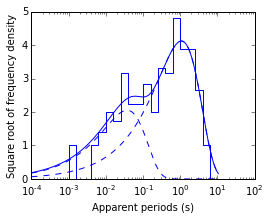

In [9]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
dcplots.xlog_hist_expPDF(ax, 0.0001, pdf=expPDF, shut=False) 
print(expPDF)

### Calculate approximate SD

Approximate standard deviations of estimated values are calculated using the observed information matrix.   The observed information, or observed Fisher information, is the negative of the second derivative (the Hessian matrix) of the "log-likelihood".

In [10]:
errs = ObservedInformation(res.x, expPDF, expPDF.loglik)
errs.print_errs()

Par: 0.037007; approximate SD = 0.014062
Par: 1.073026; approximate SD = 0.150420
Par: 0.198745; approximate SD = 0.057958


### Calculate likelihood intervals

The most likely values of the parameters are those that correspond to maximal log-likelihood, $L_{max}$.  The likelihood intervals for for a particular parameter are estimated by holding that parameter at a fixed value away from $L_{max}$ and repeating the fit with all other parameters free to vary. Log-likelihood value so achieved, $L_{crit}$, is less than $L_{max}$.  $L_{crit}$ is obtained for two values of the parameter, one above and one below its maximum likelihood estimate.  These upper and lower limits are usually asymmetrical to the best fit value. 

In [12]:
ll = LikelihoodIntervals(res.x, expPDF, errs.approximateSD)
print('Likelihood intervals')
ll.print_intervals()

Likelihood intervals
Par: 0.037007; approximate SD = 0.014062: lower limit = 0.019458; upper limit = 0.070114
Par: 1.073026; approximate SD = 0.150420: lower limit = 0.862273; upper limit = 1.381094
Par: 0.198745; approximate SD = 0.057958: lower limit = 0.111328; upper limit = 0.299697
